# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#import all the necessary modules
import numpy as np
import pandas as pd

#import DecisionTreeClassifier - for building Decision Tree model and predict whether the Pima Indian women shows signs of diabetes or not
from sklearn.tree import DecisionTreeClassifier

#import seaborn for statistical plots
import seaborn as sns

#import train_test_split to break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [24]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [2]:
pima_df = pd.read_csv("pima-indians-diabetes.csv")

In [3]:
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### See no null values, but some columns has zeroes

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [6]:
pima_df[0:10]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [7]:
print(pima_df.info())
print('\nShape of dataset ->', pima_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Shape of dataset -> (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [8]:
### replacing 0's with median for column's other than Preg and Class
pima_df2 = pima_df.iloc[:,1:8].replace(0,pima_df.median())

In [9]:
pima_df2.head()

,Plas,Pres,skin,test,mass,pedi,age
0,148,72,35,30.5,33.6,0.627,50
1,85,66,29,30.5,26.6,0.351,31
2,183,64,23,30.5,23.3,0.672,32
3,89,66,23,94.0,28.1,0.167,21
4,137,40,35,168.0,43.1,2.288,33


In [10]:
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
### extracting Class and Preg columns
pima_df1 = pima_df.iloc[:,[8,0]]

In [12]:
pima_df1.head()

,class,Preg
0,1,6
1,0,1
2,1,8
3,0,1
4,1,0


In [13]:
pima_form_df = pd.concat([pima_df1, pima_df2], axis=1, sort=False)

In [14]:
pima_form_df.head()

,class,Preg,Plas,Pres,skin,test,mass,pedi,age
0,1,6,148,72,35,30.5,33.6,0.627,50
1,0,1,85,66,29,30.5,26.6,0.351,31
2,1,8,183,64,23,30.5,23.3,0.672,32
3,0,1,89,66,23,94.0,28.1,0.167,21
4,1,0,137,40,35,168.0,43.1,2.288,33


# Q5 Print the descriptive statistics of each & every column using describe() function

In [16]:
pima_form_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [23]:
pima_form_df.groupby(["class"]).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


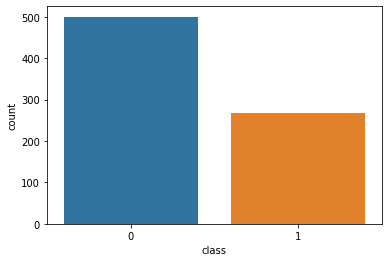

In [22]:
sns.countplot(pima_form_df['class'])

### Count for Class 0 is 500 and Class 1 is 268

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

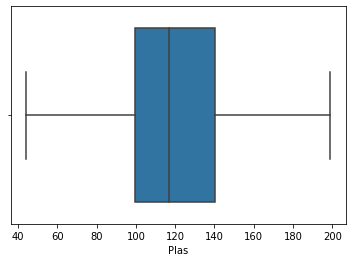

In [36]:
sns.boxplot(pima_form_df['Plas'])

### data distribution for column Plasma glucose concentration is symmetric, Median is 117

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\Dist\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Dist\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


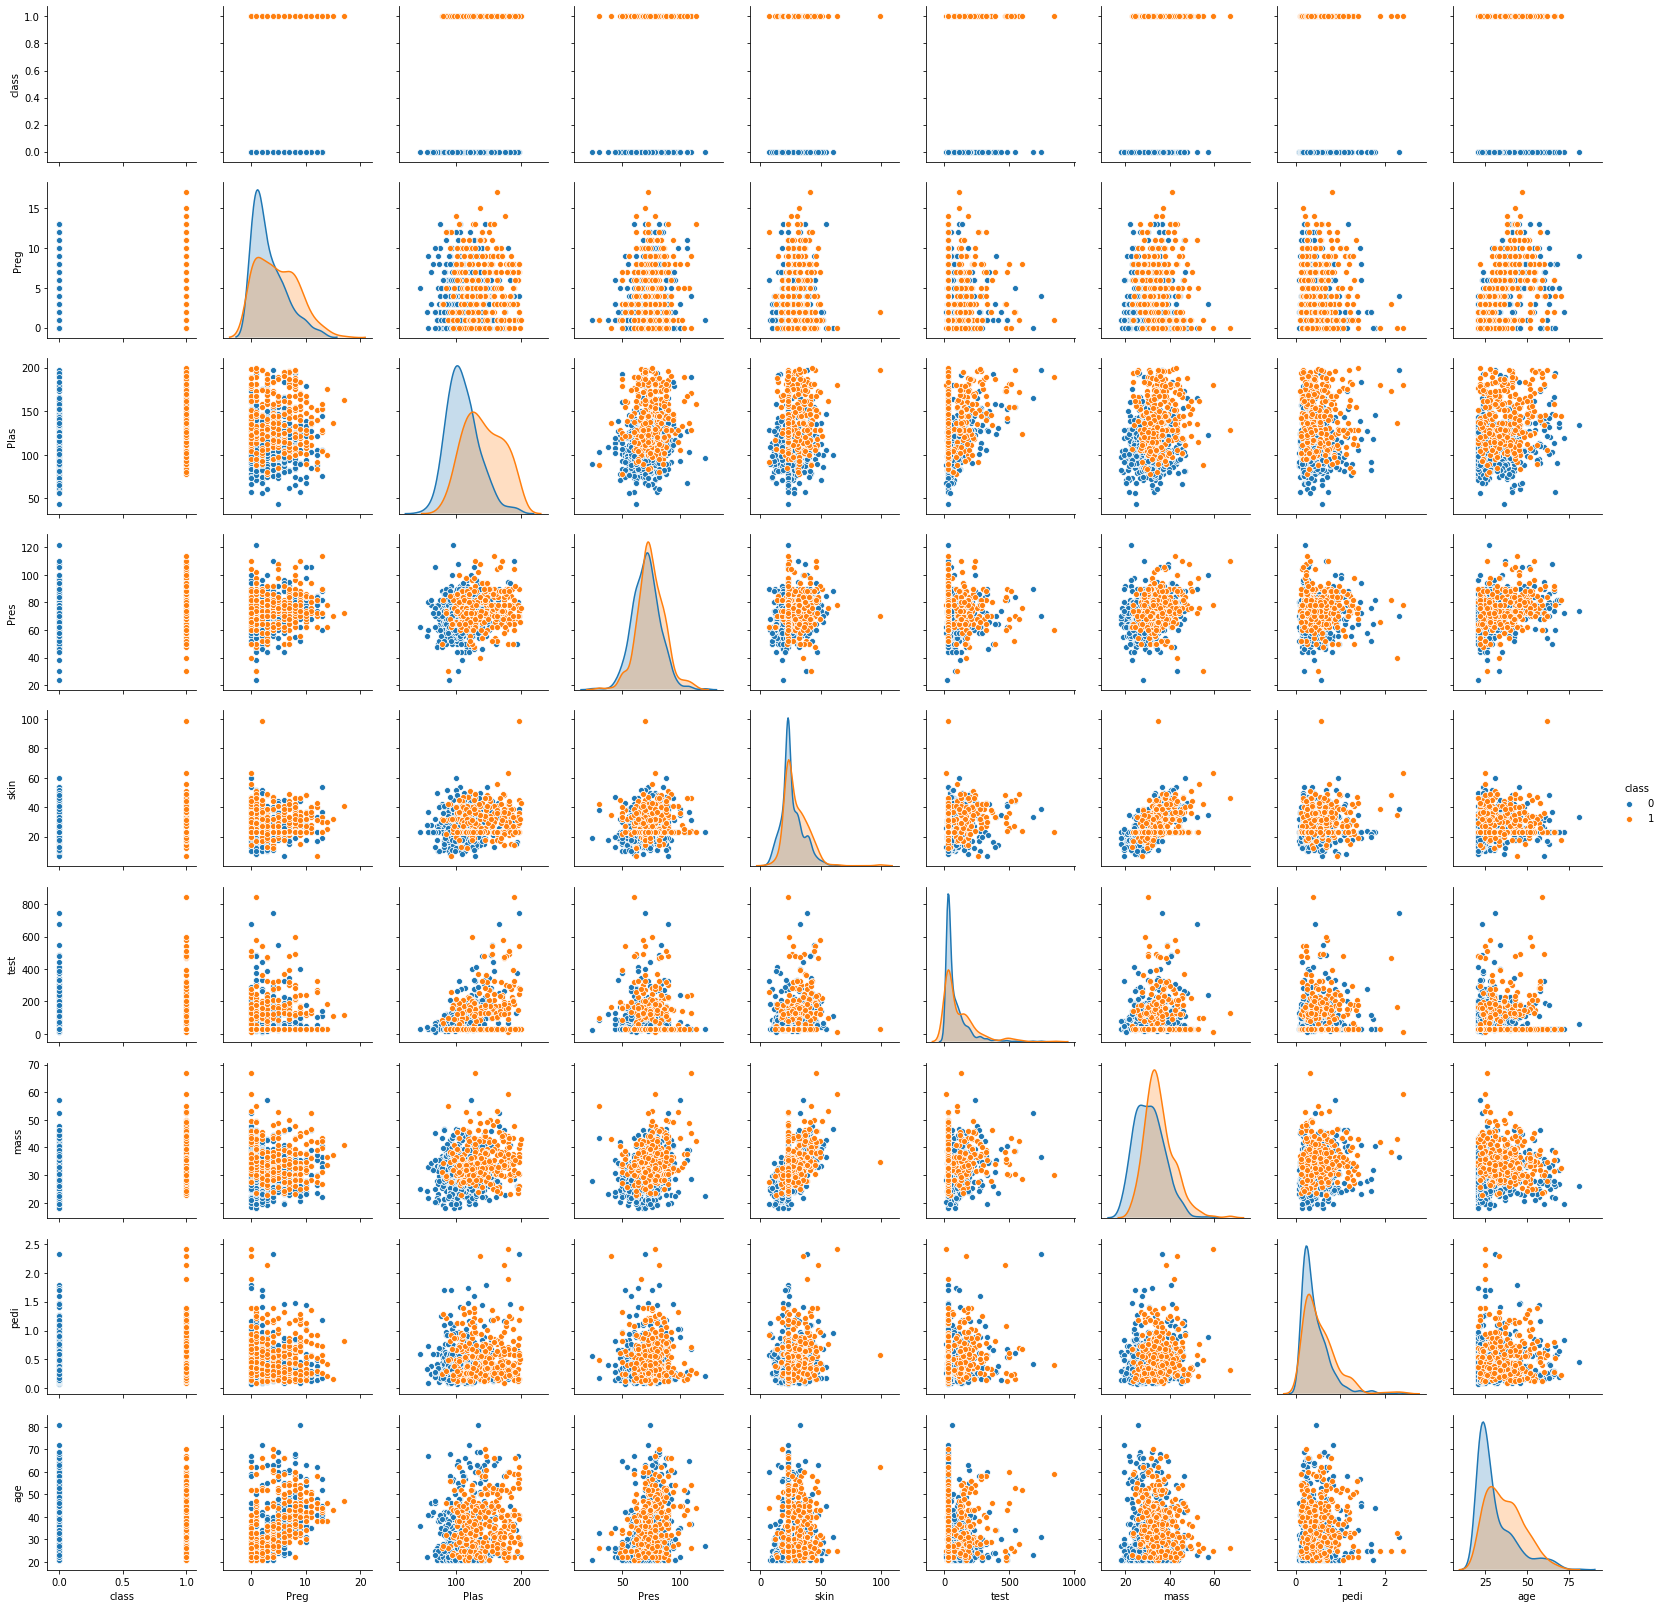

In [40]:
sns.pairplot(pima_form_df, hue = "class")

In [41]:
pima_form_df.corr()

,class,Preg,Plas,Pres,skin,test,mass,pedi,age
class,1.000000,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356
Preg,0.221898,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Plas,0.492782,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
Pres,0.165723,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
skin,0.189065,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
test,0.148457,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
mass,0.312249,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
pedi,0.173844,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
age,0.238356,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


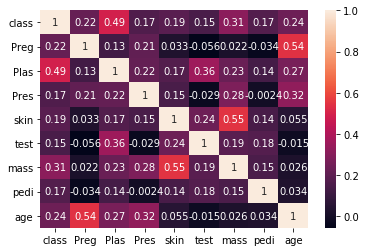

In [42]:
sns.heatmap(pima_form_df.corr(),annot=True)

### strength of correlation b/w Class/Plas and Class/Mass are moderate, but more when compared to other columns
### So both Plas and Mass might be more important features

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [45]:
pima_form_df.head()

,class,Preg,Plas,Pres,skin,test,mass,pedi,age
0,1,6,148,72,35,30.5,33.6,0.627,50
1,0,1,85,66,29,30.5,26.6,0.351,31
2,1,8,183,64,23,30.5,23.3,0.672,32
3,0,1,89,66,23,94.0,28.1,0.167,21
4,1,0,137,40,35,168.0,43.1,2.288,33


In [46]:
X = pima_form_df.drop('class', axis=1)
Y = pima_form_df.pop('class')

In [47]:
X.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [48]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [51]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [54]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

1.0
0.70995670995671


In [55]:
y_predict = dt_model.predict(X_test)

In [56]:
print(metrics.confusion_matrix(y_test, y_predict))

[[110  36]
 [ 31  54]]


Print the feature importance of the decision model - Optional

In [57]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
Preg  0.097789
Plas  0.245628
Pres  0.157570
skin  0.048168
test  0.009768
mass  0.225609
pedi  0.107601
age   0.107867


In [62]:
dt_model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
dt_model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
print(dt_model1.score(X_train , y_train))
print(dt_model1.score(X_test , y_test))

0.8324022346368715
0.7878787878787878


In [64]:
y_predict1 = dt_model1.predict(X_test)

In [65]:
print(metrics.confusion_matrix(y_test, y_predict1))

[[120  26]
 [ 23  62]]


In [68]:
### Model 1
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       146
           1       0.60      0.64      0.62        85

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



In [69]:
### Model 2
print(metrics.classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       146
           1       0.70      0.73      0.72        85

    accuracy                           0.79       231
   macro avg       0.77      0.78      0.77       231
weighted avg       0.79      0.79      0.79       231



### Model 2 (dt_model1) is better compare to Model 1 (dt_model)
### 1) Model 2 perform similar for Train and Test
### 2) Model 2 prediction is comparativily better when compare precision, recall and f1-score 